# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Oct 25 (Thursday) 11:00 pm </font>  

<font color="blue"> Josiah Laivins </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Problems 

## A. Maze Problem (Practice)

The goal of the GridWorld class is to take a world state, and generated the expected rewards for each state. The result is an agent that can navigate a specific state space, and locate the optimal goal state.

If the state changes, or the goal changes, the agent needs to be be retrained. This is where transfer learning can be implimented.

I tested 2 learning algorithms: Sarsa and Qlearning. Explainations for both are below.

In [66]:
import matplotlib.pyplot as plt
from Logging import *
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 


In [67]:
from GridWorld import GridWorld
from QLearningModel import RLAgent

env = GridWorld('grid.txt')
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


  0%|          | 0/1000 [00:00<?, ?it/s]


Goal is found!


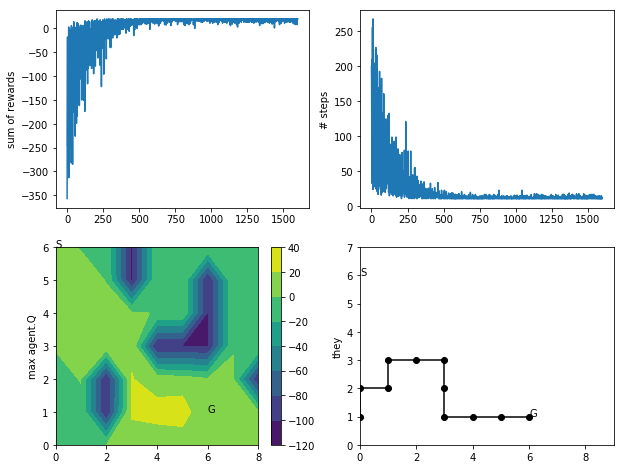

In [68]:
model = RLAgent(env)
rtrace, steps, trace = model.train_sarsa(start=None, gamma=.99, alpha=.01, epsilon=0.1, maxiter=1600, maxstep=1000)
trace = model.test([5,0])
Logging.plot_train(model, rtrace, steps, trace, [0,0], env)

100%|██████████| 1000/1000 [00:00<00:00, 15094.27it/s]


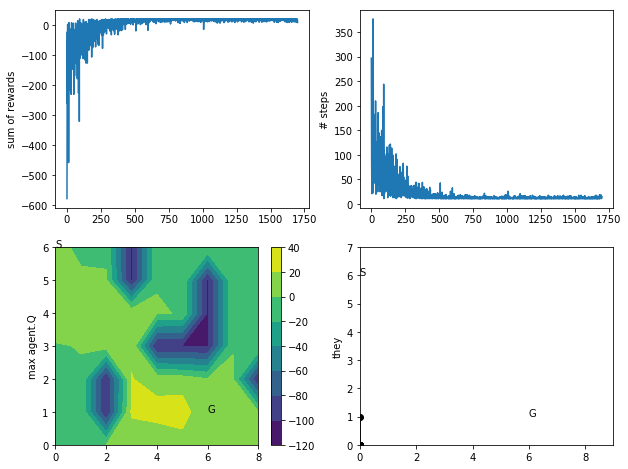

In [69]:
model = RLAgent(env)
rtrace, steps, trace = model.train_q(start=None, gamma=.99, alpha=.01, epsilon=0.1, maxiter=1700, maxstep=1000)
trace = model.test([5,0])
Logging.plot_train(model, rtrace, steps, trace, [0,0], env)

## III. Methods: GridWorld

Based on the results, the Q Learning approach seemed to have slightly more optimal paths than the Sarsa approach, but requires more training. I tested 1000 iterations for both methods, and dropped it to 500 for both, and found that Sarsa still finds the goal, while Q Learning required a few more iterations to find a decent policy. Q Learning seems favor shorter paths (which is good), but requires more training.  

However, if the start position differs from the training position, Sarsa requires fewer iterations for get to the goal. 

Regardless, if the test start differs too much from the trained start location, then there is threat of hitting local minimums. Neither model can generalize enough to train on [0,0], and test from [1,8].

100%|██████████| 1000/1000 [00:00<00:00, 15357.39it/s]


Goal is found!


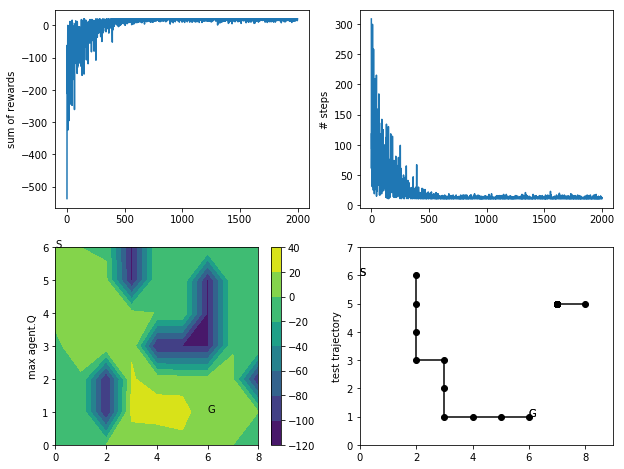

In [70]:
model = RLAgent(env)
rtrace, steps, trace = model.train_q(start=None, gamma=.99, alpha=.01, epsilon=0.1, maxiter=2000, maxstep=1000)
test_start = [0,2]
trace = model.test(test_start)
Logging.plot_train(model, rtrace, steps, trace, [0,0], env)
test_start = [1,8]
trace = agent.test(test_start)
Logging.plot_trace(model, start, trace, env)

## B. Blackjack-V0 (Last semester's - will be changed) 

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


In [71]:
from PokerQLearningModel import RLAgent
from BlackJack import Poker, Player, PokerEnvWrapper

poker = Poker(number_of_player=2)
player1 = Player("prajval", start_balance=10, is_computer=0)
computer1 = Player("computer1", start_balance=10, is_computer=1)
poker.add_player(player1)
poker.add_player(computer1)

rl = RLAgent(PokerEnvWrapper(poker, "prajval"))
rtrace, steps = rl.train_sarsa(start=None, poker=poker, gamma=.99, alpha=.01,
                               epsilon=0.1, maxiter=3000)
while not poker.deal():
    print("-" * 50)
    print("Deal Start!")
    print("Start State: {}".format(poker.get_current_state()))
    actions = poker.get_valid_actions("prajval")
    print("Available actions for: prajval are {}".format(actions))
    action_taken = rl.greedy(rl.env.get_cur_state())
    result = poker.player_play("prajval", action_taken)
    while not result[-1]:
        actions = poker.get_valid_actions("prajval")
        print("Available actions for: prajval are {}".format(actions))
        action_taken = rl.greedy(rl.env.get_cur_state())
        result = poker.player_play("prajval", action_taken)
    print("Final Result: {}".format(result))
    print("*" * 50)

  0%|          | 13/3000 [00:00<00:26, 114.10it/s]

prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check

  2%|▏         | 51/3000 [00:00<00:21, 139.66it/s]


Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Ro

  2%|▏         | 74/3000 [00:00<00:23, 125.40it/s]

computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajv

  3%|▎         | 92/3000 [00:00<00:22, 128.30it/s]


computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available act

  5%|▌         | 150/3000 [00:01<00:19, 148.55it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1

  6%|▌         | 182/3000 [00:01<00:17, 159.90it/s]


prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 12)]
Printing winning players: computer1
Reward : -3
Player doesnt have balance !
prajval can no longer play the game !
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round N

  8%|▊         | 230/3000 [00:01<00:17, 161.85it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 4)]
Printing winning players: prajval
Reward : 6.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1


  8%|▊         | 254/3000 [00:01<00:16, 161.64it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doe

 11%|█▏        | 338/3000 [00:01<00:14, 180.25it/s]

computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: comp

 12%|█▏        | 370/3000 [00:02<00:14, 181.01it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 fold

 14%|█▍        | 423/3000 [00:02<00:13, 185.37it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 3.
Available actions for: computer1 

 16%|█▌        | 487/3000 [00:02<00:12, 194.57it/s]


computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]

 19%|█▉        | 570/3000 [00:02<00:11, 209.11it/s]

Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 8

 20%|██        | 603/3000 [00:03<00:12, 198.07it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Print

 21%|██        | 629/3000 [00:03<00:11, 199.85it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 3)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1, 2]

 22%|██▏       | 655/3000 [00:03<00:12, 188.32it/s]


computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 3.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active p

 23%|██▎       | 676/3000 [00:03<00:12, 186.87it/s]

Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 8)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 a

 24%|██▍       | 719/3000 [00:03<00:12, 187.41it/s]


computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 10)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
c

 25%|██▍       | 739/3000 [00:04<00:12, 182.38it/s]

Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 4)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 folds
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Pl

 26%|██▌       | 776/3000 [00:04<00:12, 180.34it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1

 27%|██▋       | 818/3000 [00:04<00:12, 181.36it/s]

computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 6)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
comp

 28%|██▊       | 837/3000 [00:04<00:12, 177.77it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0

 28%|██▊       | 853/3000 [00:04<00:12, 176.20it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1',

 29%|██▉       | 881/3000 [00:05<00:12, 172.15it/s]


computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.


 30%|███       | 910/3000 [00:05<00:12, 170.10it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 11)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for R

 32%|███▏      | 966/3000 [00:05<00:11, 174.03it/s]

Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet M

 33%|███▎      | 986/3000 [00:05<00:11, 172.05it/s]

computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 3)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 4)]
Printing winning players: prajval
Reward : 6.0
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 4)

 33%|███▎      | 1004/3000 [00:05<00:11, 168.54it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer

 34%|███▍      | 1019/3000 [00:06<00:12, 163.54it/s]

Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 10)]
Printing winning players: computer1
Reward : -3
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for 

 35%|███▍      | 1037/3000 [00:06<00:12, 161.61it/s]


computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
praj

 35%|███▌      | 1061/3000 [00:06<00:12, 157.34it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1'

 36%|███▌      | 1071/3000 [00:06<00:12, 154.03it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for

 37%|███▋      | 1112/3000 [00:07<00:12, 154.29it/s]

computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check r

 38%|███▊      | 1144/3000 [00:07<00:12, 154.02it/s]


Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 

 40%|███▉      | 1192/3000 [00:07<00:11, 155.37it/s]

computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval pl

 41%|████      | 1230/3000 [00:07<00:11, 155.81it/s]


computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds

 42%|████▏     | 1247/3000 [00:08<00:11, 154.04it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1

 43%|████▎     | 1276/3000 [00:08<00:11, 153.26it/s]


Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
computer1 ca

 43%|████▎     | 1302/3000 [00:08<00:11, 150.83it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availa

 44%|████▍     | 1327/3000 [00:08<00:11, 148.67it/s]


Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Activ

 45%|████▌     | 1354/3000 [00:09<00:11, 147.44it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availa

 46%|████▌     | 1373/3000 [00:09<00:11, 146.88it/s]


Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are 

 47%|████▋     | 1409/3000 [00:09<00:10, 146.74it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajv

 47%|████▋     | 1422/3000 [00:09<00:10, 145.64it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajva

 48%|████▊     | 1445/3000 [00:10<00:10, 142.59it/s]

Active player cards: [('prajval', 7), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]

 49%|████▉     | 1468/3000 [00:10<00:10, 141.67it/s]


prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 4)]
Prin

 50%|████▉     | 1493/3000 [00:10<00:10, 141.09it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 6)]
Prin

 50%|█████     | 1504/3000 [00:10<00:10, 139.39it/s]


computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajv

 51%|█████▏    | 1541/3000 [00:11<00:10, 138.46it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 6)]
Printing winning players: prajval
Reward : 6.0
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 13)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the

 52%|█████▏    | 1574/3000 [00:11<00:10, 138.81it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 8)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 5)]
Printing winning players: prajva

 53%|█████▎    | 1587/3000 [00:11<00:10, 138.25it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1'

 54%|█████▎    | 1612/3000 [00:11<00:10, 136.44it/s]


Active player cards: [('prajval', 5), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Num

 54%|█████▍    | 1633/3000 [00:11<00:09, 137.00it/s]

Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 3)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 9)]
Printing winning players: prajval
Reward : 6.0
prajval folds
Available actions for: computer1 are [

 55%|█████▍    | 1647/3000 [00:12<00:10, 135.01it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 7)]
Printing winning pla

 56%|█████▌    | 1676/3000 [00:12<00:09, 133.32it/s]

Winner: draw
Active player cards: [('prajval', 13), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check result

computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Pl

 57%|█████▋    | 1698/3000 [00:13<00:10, 129.60it/s]

Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 12)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1]
c

 57%|█████▋    | 1720/3000 [00:13<00:09, 130.12it/s]


Printing winning players: computer1
Reward : -3
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player

 58%|█████▊    | 1747/3000 [00:13<00:09, 128.39it/s]

computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
praj

 59%|█████▉    | 1783/3000 [00:13<00:09, 128.60it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer

 61%|██████    | 1817/3000 [00:14<00:09, 128.74it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 7)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1]
computer1 

 61%|██████    | 1831/3000 [00:14<00:09, 128.40it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval pl

 63%|██████▎   | 1886/3000 [00:14<00:08, 129.72it/s]

Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results f

 64%|██████▍   | 1928/3000 [00:14<00:08, 130.31it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actions for: compu

 65%|██████▌   | 1952/3000 [00:14<00:08, 130.55it/s]

Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 9)]
Printing winning play

 66%|██████▋   | 1994/3000 [00:15<00:07, 130.31it/s]


computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajv

 68%|██████▊   | 2026/3000 [00:15<00:07, 129.72it/s]

Active player cards: [('prajval', 5), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1

 69%|██████▉   | 2081/3000 [00:15<00:07, 131.12it/s]


computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 12)]
Printing winning players: computer1
Reward : -3
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: comp

 71%|███████   | 2122/3000 [00:16<00:06, 131.82it/s]

Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 11)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 6)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no long

 72%|███████▏  | 2162/3000 [00:16<00:06, 132.17it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Printing winning 

 73%|███████▎  | 2183/3000 [00:16<00:06, 132.38it/s]

Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 folds
prajval folds
Available actions for: computer1 ar

 74%|███████▍  | 2228/3000 [00:16<00:05, 132.60it/s]


prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 5)]
Printi

 76%|███████▌  | 2284/3000 [00:17<00:05, 134.01it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 6)]
Printin

 78%|███████▊  | 2334/3000 [00:17<00:04, 134.97it/s]


computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
pra

 79%|███████▊  | 2356/3000 [00:17<00:04, 134.52it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1'

 79%|███████▉  | 2379/3000 [00:17<00:04, 134.74it/s]


prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Player doesnt have balance !


 81%|████████  | 2433/3000 [00:17<00:04, 135.29it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availab

 83%|████████▎ | 2491/3000 [00:18<00:03, 136.63it/s]


prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 10)]
Print

 84%|████████▍ | 2533/3000 [00:18<00:03, 137.05it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 2)]
Printi

 85%|████████▌ | 2552/3000 [00:18<00:03, 137.30it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('compute

 86%|████████▋ | 2591/3000 [00:18<00:02, 136.51it/s]

Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0

 87%|████████▋ | 2606/3000 [00:19<00:02, 136.02it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 7)]
Printing winning pla

 88%|████████▊ | 2636/3000 [00:19<00:02, 135.53it/s]

Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]

 88%|████████▊ | 2648/3000 [00:19<00:02, 134.99it/s]


computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
pr

 89%|████████▉ | 2680/3000 [00:19<00:02, 134.49it/s]

Active player cards: [('prajval', 10), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round N

 90%|█████████ | 2713/3000 [00:20<00:02, 134.59it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]

 92%|█████████▏| 2771/3000 [00:20<00:01, 135.70it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Removing player: computer1 due to insufficient funds !!
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
co

 93%|█████████▎| 2789/3000 [00:20<00:01, 135.48it/s]


prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actio

 94%|█████████▍| 2828/3000 [00:20<00:01, 135.24it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availa

 95%|█████████▌| 2860/3000 [00:21<00:01, 135.91it/s]


Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available

 97%|█████████▋| 2904/3000 [00:21<00:00, 136.21it/s]

Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 3)]
Printing winning play

 98%|█████████▊| 2931/3000 [00:21<00:00, 136.64it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 13)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have

 99%|█████████▉| 2969/3000 [00:21<00:00, 136.18it/s]

computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
pr

100%|██████████| 3000/3000 [00:21<00:00, 136.50it/s]



Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1

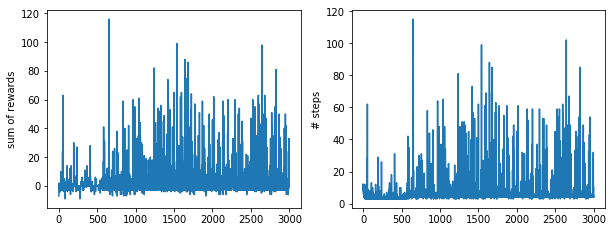

In [72]:
# For Sarsa logging
Logging.plot_train(rl, rtrace, steps)

In [74]:
from PokerQLearningModel import RLAgent
from BlackJack import Poker, Player, PokerEnvWrapper

poker = Poker(number_of_player=2)
player1 = Player("prajval", start_balance=10, is_computer=0)
computer1 = Player("computer1", start_balance=10, is_computer=1)
poker.add_player(player1)
poker.add_player(computer1)

rl = RLAgent(PokerEnvWrapper(poker, "prajval"))
rtrace, steps = rl.train_q(start=None, poker=poker, gamma=.99, alpha=.01,
                               epsilon=0.1, maxiter=3000)
while not poker.deal():
    print("-" * 50)
    print("Deal Start!")
    print("Start State: {}".format(poker.get_current_state()))
    actions = poker.get_valid_actions("prajval")
    print("Available actions for: prajval are {}".format(actions))
    action_taken = rl.greedy(rl.env.get_cur_state())
    result = poker.player_play("prajval", action_taken)
    while not result[-1]:
        actions = poker.get_valid_actions("prajval")
        print("Available actions for: prajval are {}".format(actions))
        action_taken = rl.greedy(rl.env.get_cur_state())
        result = poker.player_play("prajval", action_taken)
    print("Final Result: {}".format(result))
    print("*" * 50)

  1%|          | 16/3000 [00:00<00:33, 88.72it/s]

prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player fol

  1%|          | 30/3000 [00:00<00:29, 99.77it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 10)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Check res

  2%|▏         | 56/3000 [00:00<00:30, 97.50it/s]


Winner: draw
Active player cards: [('prajval', 4), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results f

  3%|▎         | 103/3000 [00:00<00:23, 123.86it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player

  5%|▌         | 160/3000 [00:01<00:18, 152.08it/s]


computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 

  6%|▌         | 180/3000 [00:01<00:20, 139.27it/s]

Active player cards: [('prajval', 2), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Num

  7%|▋         | 203/3000 [00:01<00:19, 141.22it/s]

Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balance !
prajval can no longer play the game !
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winne

  8%|▊         | 235/3000 [00:01<00:20, 135.54it/s]

computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !

  8%|▊         | 249/3000 [00:01<00:20, 131.92it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 f

Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active

  9%|▊         | 262/3000 [00:02<00:24, 112.06it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available acti

  9%|▉         | 272/3000 [00:02<00:26, 101.94it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer

  9%|▉         | 280/3000 [00:02<00:28, 94.57it/s] 


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [

 11%|█         | 317/3000 [00:03<00:26, 100.00it/s]

Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
pra

 12%|█▏        | 371/3000 [00:03<00:24, 108.52it/s]


Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active

 14%|█▍        | 414/3000 [00:03<00:22, 113.26it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [

 14%|█▍        | 432/3000 [00:03<00:22, 112.97it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player doesnt have balance !
prajval can no 

 16%|█▌        | 481/3000 [00:04<00:21, 117.46it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 9)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: 

 17%|█▋        | 507/3000 [00:04<00:20, 120.40it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner:

 18%|█▊        | 527/3000 [00:04<00:21, 114.29it/s]

Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 6)]
Printing winning pla

 19%|█▉        | 568/3000 [00:04<00:21, 115.61it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 2)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 folds
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Ro

 20%|██        | 603/3000 [00:05<00:20, 117.55it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 f

 21%|██        | 620/3000 [00:05<00:20, 115.81it/s]


prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available a

 22%|██▏       | 647/3000 [00:05<00:20, 115.83it/s]

Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 9)]
Printing winning players: prajval
Reward : 6.0
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Check results for Round Number: 1

 22%|██▏       | 660/3000 [00:05<00:20, 113.24it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0

 23%|██▎       | 692/3000 [00:06<00:20, 114.52it/s]

Player doesnt have balance !
prajval can no longer play the game !
prajval plays 3.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
compu

 24%|██▎       | 705/3000 [00:06<00:19, 114.76it/s]


computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Ch

 24%|██▍       | 730/3000 [00:06<00:20, 112.58it/s]

Player doesnt have balance !
prajval can no longer play the game !
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, P

 26%|██▋       | 789/3000 [00:06<00:18, 116.73it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 7)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 12)]
Printing winning players: computer1
Reward : -3
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Pri

 27%|██▋       | 806/3000 [00:07<00:19, 114.28it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availa

 28%|██▊       | 831/3000 [00:07<00:18, 115.76it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Play

 29%|██▉       | 867/3000 [00:07<00:18, 115.79it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availa

 29%|██▉       | 882/3000 [00:07<00:18, 116.22it/s]


prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
pr

 30%|███       | 908/3000 [00:07<00:18, 114.41it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1

 31%|███       | 937/3000 [00:08<00:17, 114.71it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 8)]
Printing winning pl

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1'

 32%|███▏      | 970/3000 [00:08<00:17, 113.37it/s]


computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1

 34%|███▎      | 1005/3000 [00:08<00:17, 114.59it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 7)]
Printi

 35%|███▌      | 1062/3000 [00:09<00:16, 116.88it/s]


prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw


 36%|███▌      | 1083/3000 [00:09<00:16, 117.89it/s]

Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 9)]
Printing winning player

Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
c

 38%|███▊      | 1126/3000 [00:09<00:16, 115.73it/s]

computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 11)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.

 39%|███▊      | 1158/3000 [00:09<00:15, 116.01it/s]


Available actions for: computer1 are [0, 1]
computer1 plays 1.
Removing player: computer1 due to insufficient funds !!
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: com

 40%|███▉      | 1193/3000 [00:10<00:15, 116.83it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 3.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: 

 42%|████▏     | 1247/3000 [00:10<00:14, 119.31it/s]


computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 12)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 5)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have bal

 43%|████▎     | 1284/3000 [00:10<00:14, 119.98it/s]

Active player cards: [('prajval', 9), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Num

 43%|████▎     | 1301/3000 [00:10<00:14, 120.18it/s]


prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 11)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: c

 44%|████▍     | 1317/3000 [00:11<00:14, 119.42it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player 

 45%|████▌     | 1356/3000 [00:11<00:13, 118.21it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [

 46%|████▌     | 1368/3000 [00:11<00:13, 117.03it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 4)]
Printi

 47%|████▋     | 1404/3000 [00:11<00:13, 117.50it/s]


Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Acti

 48%|████▊     | 1436/3000 [00:12<00:13, 117.48it/s]

prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 12)]
Printing winning players: computer1
Reward : -3
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 pla

 48%|████▊     | 1450/3000 [00:12<00:13, 117.64it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0

 49%|████▉     | 1474/3000 [00:12<00:13, 116.02it/s]

Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 11)]
Printing winning pl

 50%|████▉     | 1494/3000 [00:12<00:13, 115.56it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval pl

 51%|█████▏    | 1542/3000 [00:13<00:12, 117.41it/s]

computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 13)]
Printing winning players: computer1
Reward : -3
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
Player doesnt have balan

 53%|█████▎    | 1582/3000 [00:13<00:11, 118.36it/s]


Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 5)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Removing player: computer1 due to insufficient funds !!
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
co

 53%|█████▎    | 1600/3000 [00:13<00:11, 117.10it/s]


Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 6)]
Printing winning pl

 55%|█████▍    | 1645/3000 [00:13<00:11, 118.35it/s]


prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 4)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 2)]
Printing

 56%|█████▌    | 1678/3000 [00:14<00:11, 118.75it/s]

Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning pla

 57%|█████▋    | 1722/3000 [00:14<00:10, 119.87it/s]


Active player cards: [('prajval', 4), ('computer1', 7)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 5)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Removing player: computer1 due to insufficient funds !!
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available action

 59%|█████▊    | 1757/3000 [00:14<00:10, 120.26it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 3.0
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Check resu

 60%|██████    | 1800/3000 [00:14<00:09, 121.44it/s]


computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
pr

 62%|██████▏   | 1868/3000 [00:15<00:09, 123.26it/s]

prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 10)]
Pri

 63%|██████▎   | 1889/3000 [00:15<00:08, 123.47it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: 

 64%|██████▎   | 1908/3000 [00:15<00:08, 123.14it/s]


prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Playe

 64%|██████▍   | 1924/3000 [00:15<00:08, 120.95it/s]


Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 13)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 10)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active playe

 65%|██████▍   | 1949/3000 [00:16<00:08, 120.48it/s]

Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available act

 66%|██████▌   | 1965/3000 [00:16<00:08, 120.62it/s]

prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 4)]
Printing winning players: prajval compu

 66%|██████▌   | 1982/3000 [00:16<00:08, 119.30it/s]

Winner: draw
Active player cards: [('prajval', 6), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results

 67%|██████▋   | 2011/3000 [00:16<00:08, 119.54it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [

 70%|███████   | 2101/3000 [00:17<00:07, 122.35it/s]

Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 a

 72%|███████▏  | 2148/3000 [00:17<00:06, 123.13it/s]


prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval folds
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Check results for Round Number: 1
Computer active, Player folds !
Winner: computer
Printing winning players: computer1
Reward : -1
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 11)]
Printing winning players: computer1
Reward : -3
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1


 72%|███████▏  | 2169/3000 [00:17<00:06, 123.22it/s]

Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet M

 74%|███████▍  | 2224/3000 [00:17<00:06, 124.60it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [

 77%|███████▋  | 2308/3000 [00:18<00:05, 126.89it/s]

prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 13)]
Printing winning players: computer1
Reward : -3
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 3.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
pra

 78%|███████▊  | 2333/3000 [00:18<00:05, 126.76it/s]


Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0

 79%|███████▉  | 2379/3000 [00:18<00:04, 127.56it/s]

Active player cards: [('prajval', 4), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Numb

 81%|████████  | 2430/3000 [00:18<00:04, 128.53it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer 

 83%|████████▎ | 2484/3000 [00:19<00:03, 129.57it/s]

Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
c

 84%|████████▎ | 2506/3000 [00:19<00:03, 129.63it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 4)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 10)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer

 87%|████████▋ | 2602/3000 [00:19<00:03, 132.26it/s]

Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 5)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Removing player: computer1 due to insufficient funds !!
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 13)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: c

 89%|████████▉ | 2664/3000 [00:19<00:02, 133.68it/s]


Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Acti

 90%|████████▉ | 2691/3000 [00:20<00:02, 133.88it/s]

Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Avai

 90%|█████████ | 2715/3000 [00:20<00:02, 134.16it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 9)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 2)]
Printing winning players: p

 91%|█████████▏| 2744/3000 [00:20<00:01, 131.85it/s]

Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 11), ('computer1', 7)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Activ

 92%|█████████▏| 2761/3000 [00:20<00:01, 131.73it/s]

Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 4)]
Printing winning players: prajval
Reward : 6.0
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 plays 2.
Removing player: computer1 due to insufficient funds !!
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 9)]
Printing winning players: prajval
Rewa

 93%|█████████▎| 2801/3000 [00:21<00:01, 131.91it/s]

Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 5), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active 

 94%|█████████▍| 2824/3000 [00:21<00:01, 132.05it/s]


Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Availab

 95%|█████████▍| 2840/3000 [00:21<00:01, 131.51it/s]

Winner: draw
Active player cards: [('prajval', 9), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 12)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 5)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results f

 96%|█████████▌| 2865/3000 [00:21<00:01, 130.34it/s]


Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0

 96%|█████████▌| 2876/3000 [00:22<00:00, 129.60it/s]

Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 2), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 6)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 4), ('computer1',

 97%|█████████▋| 2919/3000 [00:22<00:00, 130.06it/s]


prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 11)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 5)]
Printing winning players: prajval
Reward : 6.0
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 12), ('compu

 98%|█████████▊| 2932/3000 [00:22<00:00, 129.22it/s]

computer1 folds
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 12), ('computer1', 11)]
Printing winning players: prajval
Reward : 6.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 6), ('computer1', 2)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 13), ('computer1', 9)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner

 98%|█████████▊| 2955/3000 [00:22<00:00, 128.94it/s]


Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 3.
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Player doesnt have balance !
prajval can no longer play the game !
computer1 can no longer play the game !
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Player and Computer both Bet Max and match !
Check results for Round Number: 1
Computer active, Player active ! 
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 12)]
Printing winning players: computer1
Reward : -3
prajval plays 1.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 folds
Player doesnt have balance !
prajval can no longer play the game !
prajval plays 2.
Ava

100%|█████████▉| 2989/3000 [00:23<00:00, 128.67it/s]

Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 9), ('computer1', 3)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 8), ('computer1', 13)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active 

100%|██████████| 3000/3000 [00:23<00:00, 128.45it/s]


Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 10), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer1', 11)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 3), ('computer1', 8)]
Printing winning players: prajval computer1
Reward : 1.0
prajval folds
Available actions for: computer1 are [0]
computer1 folds
Check results for Round Number: 1
Computer folds, Player folds !
Winner: draw
Active player cards: [('prajval', 7), ('computer

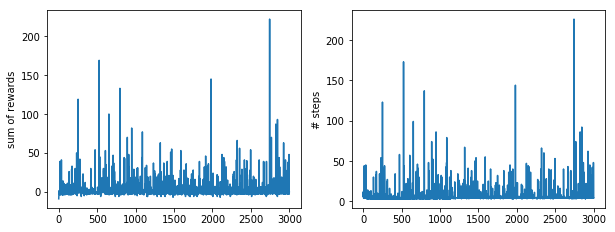

In [75]:
# For Q logging
Logging.plot_train(rl, rtrace, steps)

## III. Methods: BlackJack

Sarsa seems to out perform Q Learning in the BlackJack problem. This I beleive is due to more extensive exploration of the results of each action. Mainly, the Sarsa approach produces a higher average in the reward than the Q Learning model.

# III. Methods: Code Explainations
Here is the implimentation of the greedy epsilon method:

In [77]:
    """
    The general goal of the epsilon_greed method is to explore the space logically,
    but every so often explore into traditionally unfavorable state spaces.
    """
    def epsilon_greed(self, epsilon, s):
        if np.random.rand() < epsilon: # If a random value is below epsilon
            # Return one of the random actions
            return np.random.randint(len(self.env.get_actions()))
        else:
            # Else, return the action that has the highest reward
            return self.greedy(s)
    """
    Use the greedy approach and choose the action that has the highest reward.
    """
    def greedy(self, s):
        return np.argmax(self.Q[tuple(s)])

Below is an example of the Gridworld RLAgent training method. This method is very similar to the poker playing agent with just general changes in the method name calls:
### Training Q-Learning

In [ ]:
# init self.Q matrix
self.Q[...] = 0
# There are sections of the Q that should be excluded
self.Q = self.env.exclude_invalid_regions(self.Q)
# Each iteration is an exploration throughout the state space
for j in tqdm(range(maxiter)):
    # Re-initialize the environment (note, we are keeping the Q matrix)
    self.env.init(start)
    # Get the starting state of the environment
    s = self.env.get_cur_state()
    # Get the action that has the highest reward, or if epsilon is above 0, get a random
    # action.
    a = self.epsilon_greed(epsilon, s)

    # From the starting state, explore the state space until you reach 
    # the goal, or reach the max number of iterations. 
    for step in range(maxstep):
        # Based on the current action, what is the resulting state and reward?
        r = self.env.next(a)
        # Get the new state
        s1 = self.env.get_cur_state()
        # Get the new action from the current state
        a = self.epsilon_greed(epsilon, s1)

        # This is Q-Learning control
        """
        We get the cummulative reward for the current action found in the previous state,
        Add the learning rate multiplied by,
        The reward of the current state plus the max cummulative reward of the current state
        adjusted by gamma minus,
        The cummulative reward of the current state with the current action.
        
        We save the result into the current state, with the current action
        """
        v = self.Q[s[0], s[1], a] + alpha * (r + gamma * np.max(self.Q[s1[0], s1[1]]) - self.Q[s[0], s[1], a])
        self.Q[s[0], s[1], a] = v

        if self.env.is_goal():  # reached the goal
            # The resulting state is the goal based on the current action.
            # We want to make sure that this is higher than the 
            # states without reward, but we also
            self.Q[s1[0], s1[1], a] = 0
            break

        s = s1


### Training Sarsa Learning

In [ ]:
# init self.Q matrix
self.Q[...] = 0
self.Q = self.env.exclude_invalid_regions(self.Q)

for j in tqdm(range(maxiter)):
    self.env.init(start)

    s = self.env.get_cur_state()
    # selection an action
    a = self.epsilon_greed(epsilon, s)

    for step in range(maxstep):
        # move
        r = self.env.next(a)
        s1 = self.env.get_cur_state()
        a1 = self.epsilon_greed(epsilon, s1)

        # This is SARSA control
        v = self.Q[tuple(list(s) + list([a]))] + alpha * (r + gamma * self.Q[tuple(list(s1) + list([a1]))] -
                                                          self.Q[tuple(list(s) + list([a]))])
        self.Q[tuple(list(s) + list([a]))] = v
        if self.env.is_goal():  # reached the goal
            # Setting the Goal location to 0, allows for training
            # the best path.
            # self.normalize()
            self.Q[tuple(list(s1) + list([a1]))] = 0
            break
        s = s1
        a = a1

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

# V. Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

| points |-| description |
|--      ||-------------|
|5 | Overview| states the objective and the approach |
|10 | Maze Problem | 
|-| 5| Includes description of maze problem
|-| 5| Explains the GridWorld
|10 | Blackjack
|-| 5| Includes description of maze problem
|-| 5| Explains the Backjack-V0 (OpenAI Gym)
|25 | Methods | 
|-| 5| Review of the SARSA and Q-Learning
|-| 5| Choice of TD learning and Reason
|-|10| Implementation of the selected approach
|-| 5| explanation of the codes
|45 | Results 
|-| 5| Reports the selected parameters for both problems. 
|-|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|-|10| Output plots (5 for each)
|-|10| reading and analysis of learning results and plots (5 for each)
|5 | Conclusions 
